In [2]:
# Carregando o IMDB dataset
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

17464789/17464789 [==============================] - 1s 0us/step


In [3]:
# Cada train_data é um vetor de inteiros que representam palavras em um dicionario
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
#Cada train_label guarda 1 para review positivo ou 0 para negativo
train_labels[0]

1

In [10]:
import numpy as np

#transformando cada review em um vetor de 0 a 9999, onde se uma palavra apareceu
#ele marca 1 no vetor na posição d correpondente ao numero da palavra
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
# Convertendo labels de lista para vetores numpy
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [13]:
y_train[0]

1.0

In [15]:
# Implementando a rede neural
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation ='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [16]:
# Especificando a função de perda e função de otimização e compilando a rede
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [17]:
#Separando dados de validação
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size = 512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 99ms/step - loss: 0.5012 - accuracy: 0.7891 - val_loss: 0.3724 - val_accuracy: 0.8733
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2949 - accuracy: 0.9064 - val_loss: 0.3101 - val_accuracy: 0.8797
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2197 - accuracy: 0.9285 - val_loss: 0.2814 - val_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1674 - accuracy: 0.9480 - val_loss: 0.2829 - val_accuracy: 0.8857
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1373 - accuracy: 0.9563 - val_loss: 0.3071 - val_accuracy: 0.8798
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1131 - accuracy: 0.9653 - val_loss: 0.2969 - val_accuracy: 0.8826
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.0913 - accuracy: 0.9721 - val_loss: 0.3225 - val_accuracy: 0.8823
Epoch 8/20
30

In [20]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

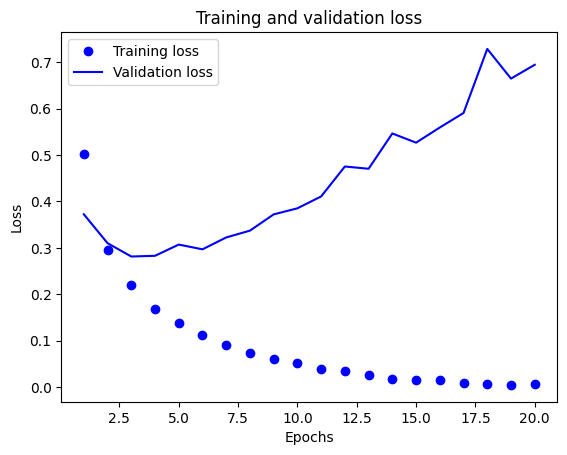

In [23]:
# Plotando a função de perda do treino e validação
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

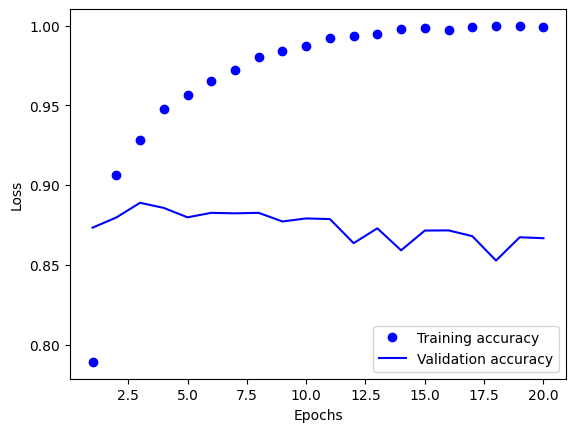

In [25]:
# Ploting the training and validation accuracy
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation accuracy')
plt.title = ('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [26]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 15ms/step - loss: 0.4389 - accuracy: 0.8334
Epoch 2/4
49/49 [==============================] - 1s 15ms/step - loss: 0.2561 - accuracy: 0.9099
Epoch 3/4
49/49 [==============================] - 1s 15ms/step - loss: 0.1996 - accuracy: 0.9281
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2915 - accuracy: 0.8849


In [27]:
#[loss, acc]
results

[0.29154735803604126, 0.884880006313324]

In [28]:
model.predict(x_test)

782/782 [==============================] - 2s 1ms/step


array([[0.21958663],
       [0.99987346],
       [0.87366956],
       ...,
       [0.1034598 ],
       [0.06905843],
       [0.65650386]], dtype=float32)